In [3]:
# Import the necessary libraries (numpy, pandas, matplotlib and seaborn)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Import the Titanic dataset available at https://www.kaggle.com/c/titanic/data (it is train.csv that you want)
titanic = pd.read_csv("train.csv") #in the folder datasets located in the same folder as the python .ipynb 

In [7]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
temp = titanic[['Survived','Name']]
temp

,Survived,Name
0,0,"Braund, Mr. Owen Harris"
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,"Heikkinen, Miss. Laina"
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,"Allen, Mr. William Henry"
...,...,...
886,0,"Montvila, Rev. Juozas"
887,1,"Graham, Miss. Margaret Edith"
888,0,"Johnston, Miss. Catherine Helen ""Carrie"""
889,1,"Behr, Mr. Karl Howell"


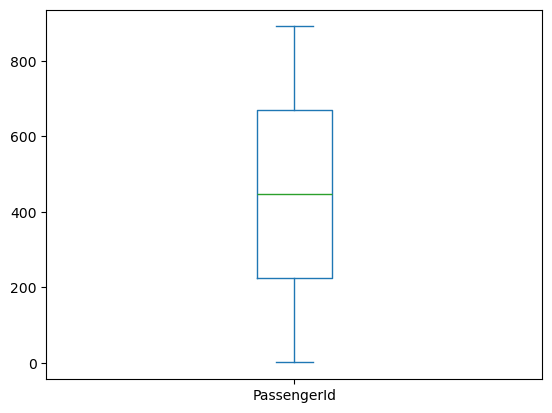

In [11]:
# Produce some box plots for numeric values in the dataset: outliers, min, 25%,50% - median, 75%, max, outliers
titanic.PassengerId.plot(kind='box')
plt.show()

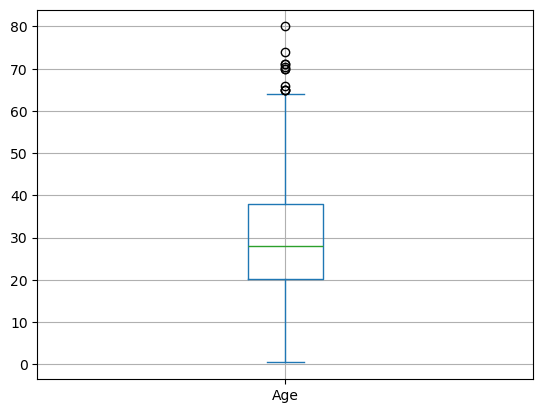

In [13]:
titanic.Age.plot(kind='box', grid='True')
plt.show()

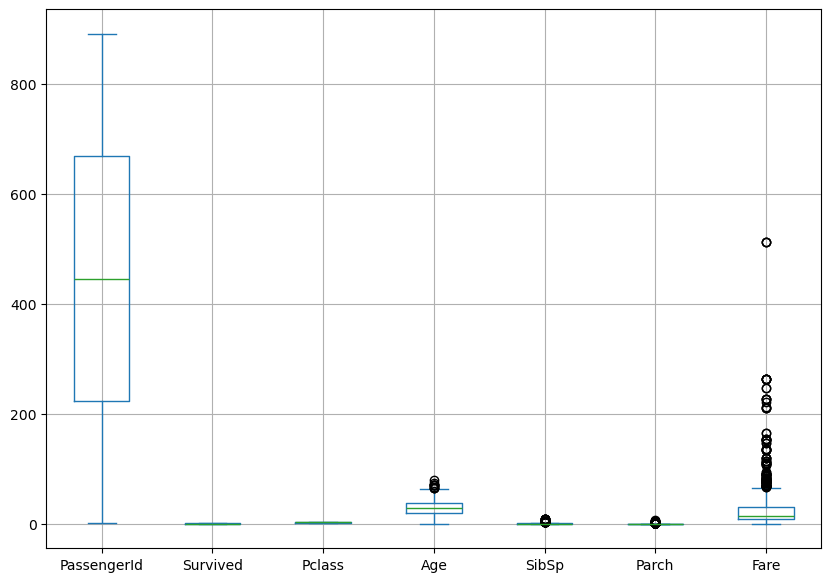

In [15]:
# Produce some box plots for numeric values in the dataset: outliers, min, 25%,50% - median, 75%, max, outliers
titanic.plot(kind='box', grid='True', figsize=(10, 7))
plt.show()

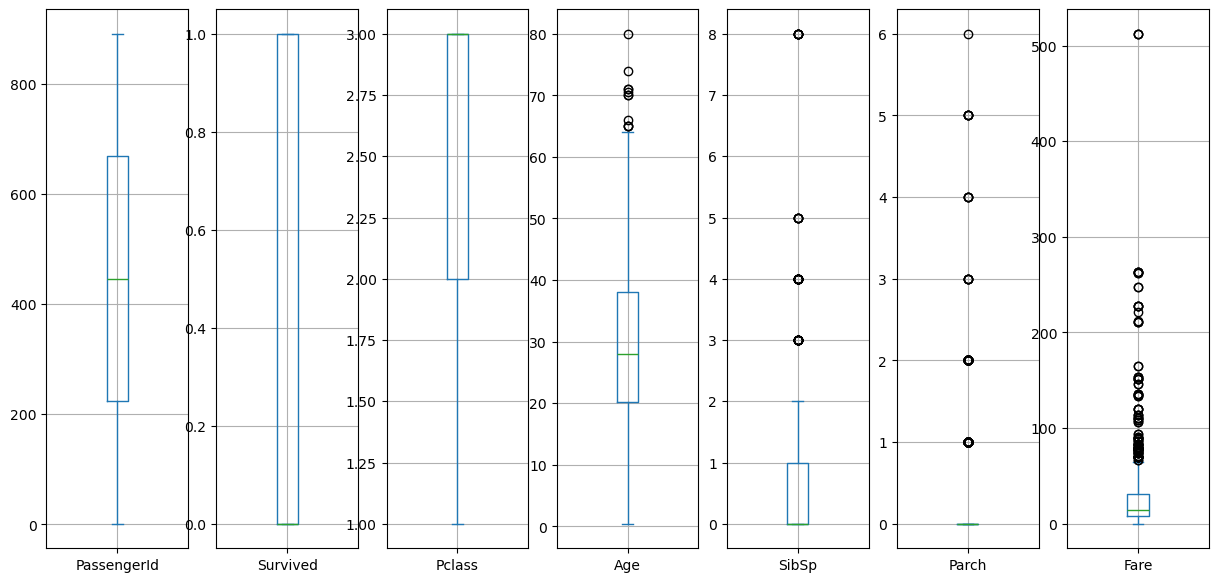

In [17]:
# Produce some box plots for numeric values in the dataset: outliers, min, 25%,50% - median, 75%, max, outliers
titanic.plot(kind='box', subplots=True, grid='True', figsize=(15, 7))
plt.show()

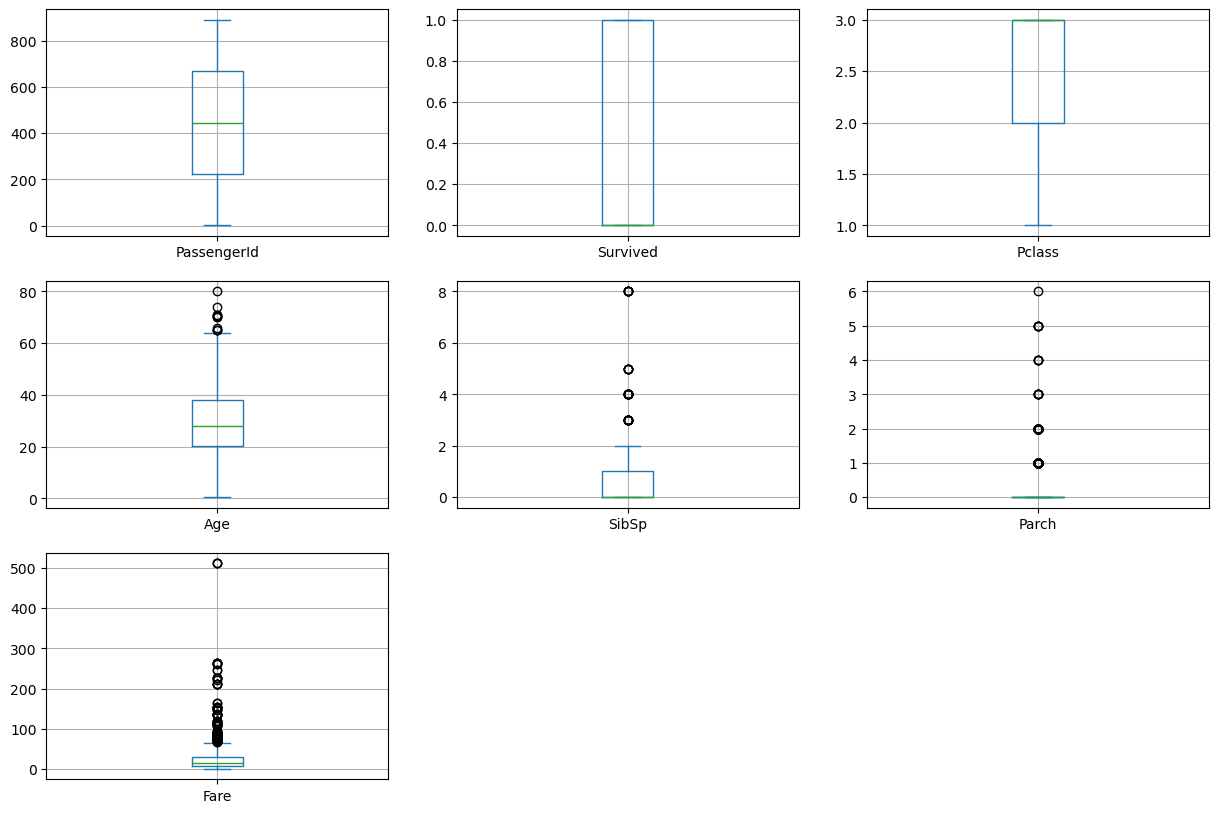

In [19]:
# Produce some box plots for numeric values in the dataset: outliers, min, 25%,50% - median, 75%, max, outliers
titanic.plot(kind='box', subplots=True, layout=(3,3), grid='True', figsize=(15, 10))
plt.show()

In [21]:
titanic.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

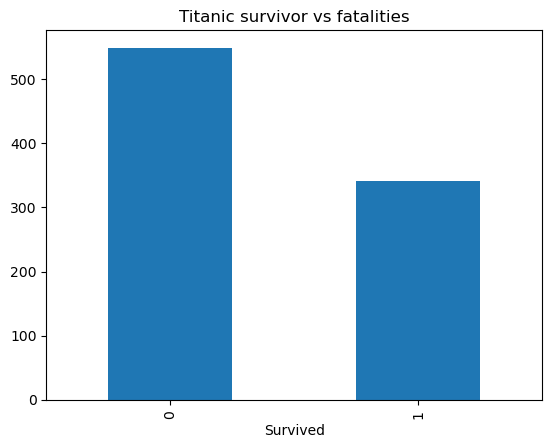

In [23]:
# Plot a bar chart showing the number of survivors and fatalities. Include a title on the chart. 0 and 1??
titanic['Survived'].value_counts().plot(kind='bar', title="Titanic survivor vs fatalities")
plt.show()

In [27]:
# Replace Values in DataFrame
titanic['Survived'] = titanic['Survived'].replace([0,1],['No','Yes'])

# you can also revert the values back to [0, 1] as below
#titanic['Survived'] = titanic['Survived'].replace(['No','Yes'],[0,1])

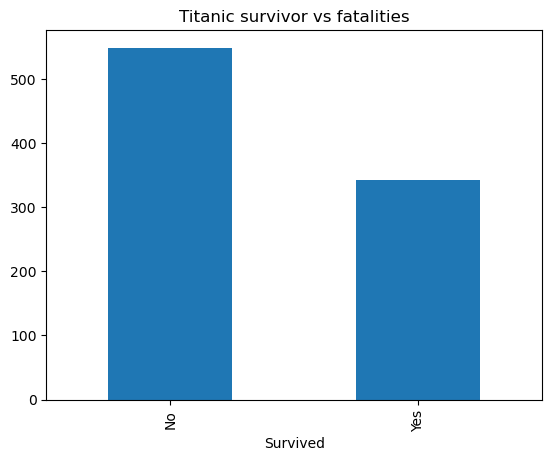

In [29]:
# Plot a bar chart showing the number of survivors and fatalities. Include a title on the chart. 0 and 1??
titanic['Survived'].value_counts().plot(kind='bar', title="Titanic survivor vs fatalities")
plt.show()

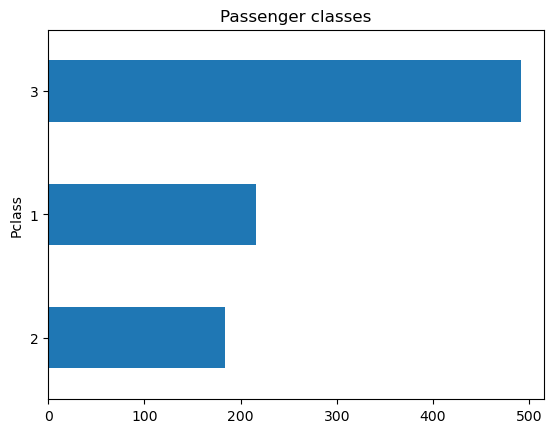

In [31]:
# Produce a horizontal bar chart showing all passenger classes, ordered with smallest number at top and largest at bottom
ttt = titanic['Pclass'].value_counts().sort_values(ascending=True).plot.barh()
plt.title('Passenger classes')
plt.show()

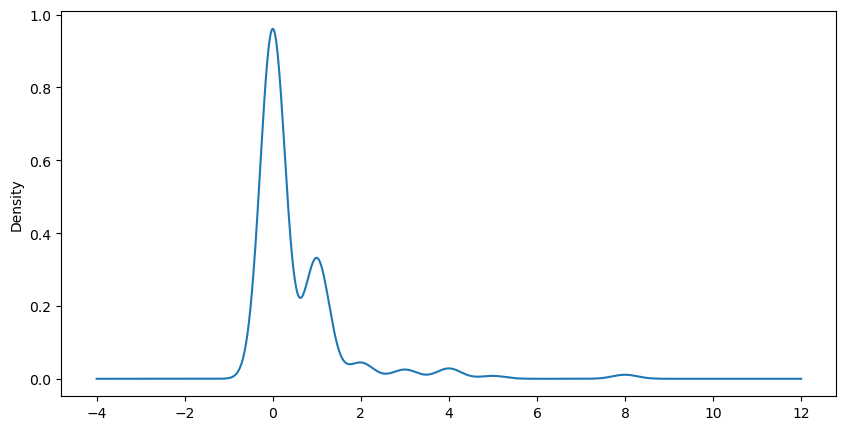

In [33]:
# Produce a density plot for number of siblings (SibSp)
# A Density Plot visualises the distribution of data over a continuous interval or time period. 
# It will allow for smoother distributions by smoothing out the noise. 
# The peaks of a Density Plot help display where values are concentrated over the interval.
# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
titanic['SibSp'].plot.density(figsize=(10, 5))
plt.show()

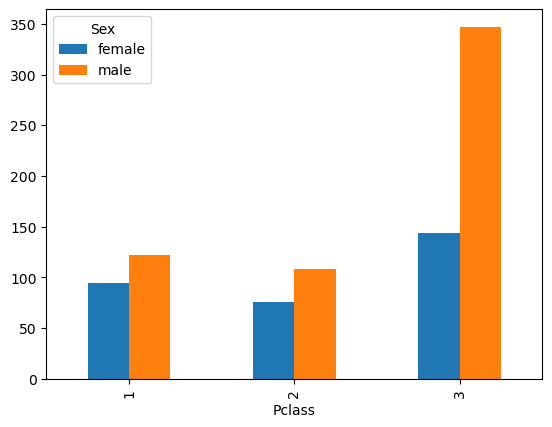

In [35]:
# Produce a stacked bar chart showing the number of each gender in each passenger class
titanic.groupby(['Pclass','Sex']).size().unstack().plot(kind='bar')
plt.show()

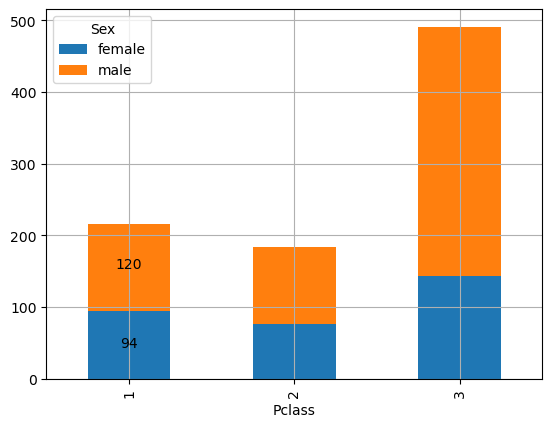

In [37]:
# Produce a stacked bar chart showing the number of each gender in each passenger class
titanic.groupby(['Pclass','Sex']).size().unstack().plot(kind='bar', stacked=True, grid=True)

# to annotate the graph, we can add the values manually, but we will have to do it for each part of the graph (annoying a bit)
plt.text(0,50,'94', ha='center', va='center')
plt.text(0,160,'120', ha='center', va='center')
plt.show()

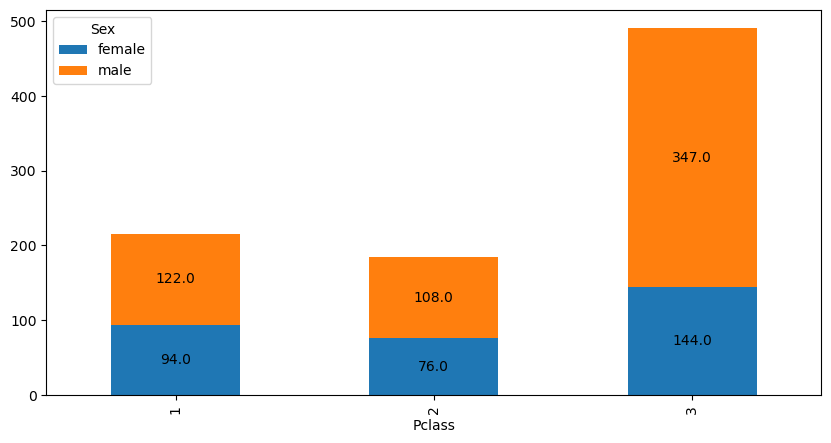

In [39]:
# Save the chart that's drawn
testChart = titanic.groupby(['Pclass','Sex']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 5))
# .patches is everything inside of the chart, lines and rectangles and circles and stuff. In this case we only have rectangles!
for rect in testChart.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The Height of the bar is also not pixels, it's the count. So we can use it as the label!
    label_text = height
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    testChart.text(label_x, label_y, label_text, ha='center', va='center')
plt.show()

In [41]:
# We can write the annotation process in a function and call it later whenever needed
def addLabels(chartUsed):
    for rect in chartUsed.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The Height of the bar is also not pixels, it's the count. So we can use it as the label!
        label_text = height

        # ax.text(x, y, text)
        label_x = x + width / 2
        label_y = y + height / 2
        chartUsed.text(label_x, label_y, label_text, ha='center', va='center')

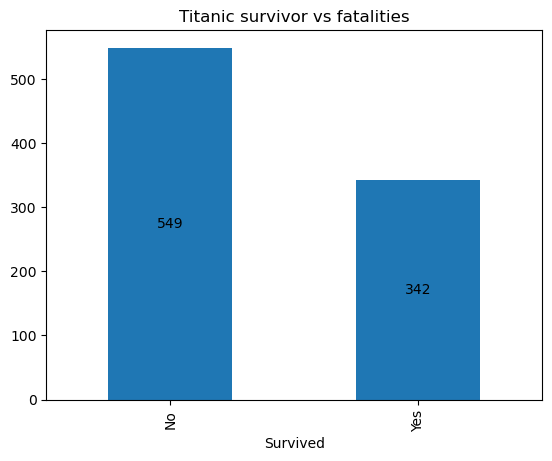

In [43]:
# Plot a bar chart showing the number of survivors and fatalities. Include a title on the chart. 0 and 1??
tempGraph = titanic.Survived.value_counts().plot.bar(title="Titanic survivor vs fatalities")
addLabels(tempGraph) # this function can help adding labels on the plot, however you need to run the function first
# this function is defined later on in this notebook
plt.show()

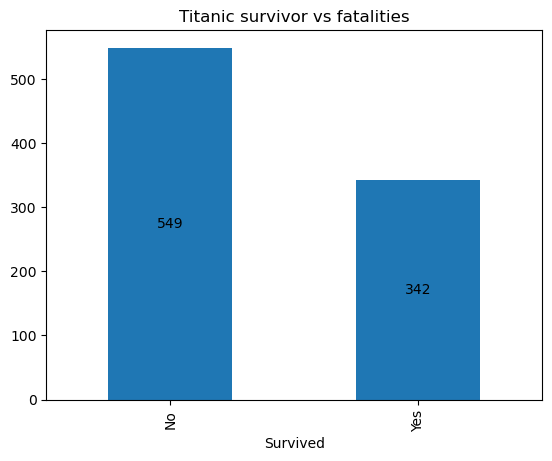

In [45]:
# Plot a bar chart showing the number of survivors and fatalities. Include a title on the chart. 0 and 1??
#titanic['Survived'].value_counts().plot(kind='bar', title="Titanic survivor vs fatalities")
tempGraph = titanic.Survived.value_counts().plot.bar(title="Titanic survivor vs fatalities")
addLabels(tempGraph) # this function can help adding labels on the plot, however you need to run the function first
# this function is defined later on in this notebook
plt.show()

In [47]:
# you can also add label for horizontal charts
def addLabelsH(chartUsed):
    for rect in chartUsed.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The Height of the bar is also not pixels, it's the count. So we can use it as the label!
        label_text = width

        # ax.text(x, y, text)
        label_x = x + width / 2
        label_y = y + height / 2
        chartUsed.text(label_x, label_y, label_text, ha='center', va='center')

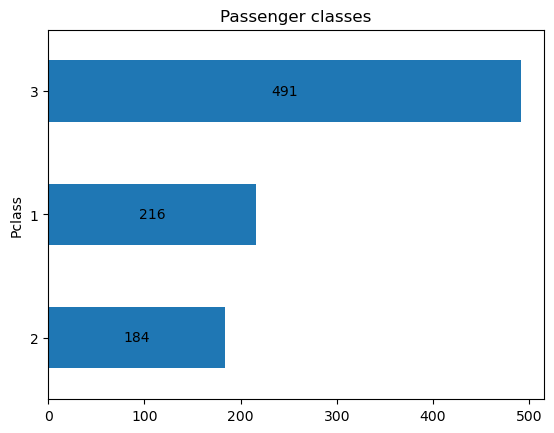

In [49]:
# Produce a horizontal bar chart showing all passenger classes, ordered with smallest number at top and largest at bottom
tempGraph = titanic['Pclass'].value_counts().sort_values(ascending=True).plot.barh()
addLabelsH(tempGraph) # make sure to use the correct function, in this case the bars are horizontals so we need to use addLabelsH
plt.title('Passenger classes')
plt.show()

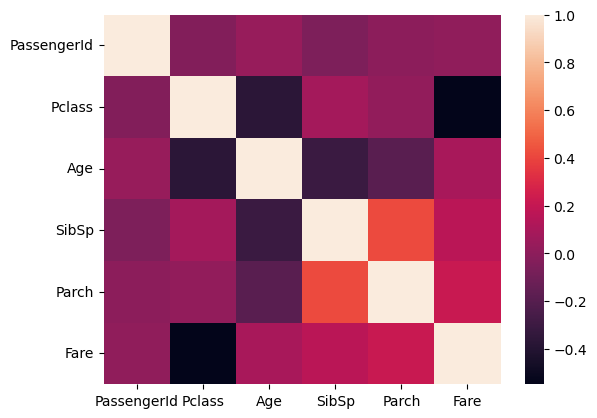

In [51]:
# Produce a heatmap showing the correlation between each numerical variable. What shows a strong correlation?
corr = titanic.corr(numeric_only = True)
sns.heatmap(corr)
plt.show()

In [7]:
# Produce a single scatter plot showing age and passenger class as well as age and number of siblings, 
# different symbols should be used to represent the two different comparisons 
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(titanic["Age"], titanic["Pclass"], color='g', marker='^')
ax.scatter(titanic["Age"], titanic["SibSp"], color='y', marker = '*')
plt.show()

NameError: name 'plt' is not defined